# SymPy
    
    

[SymPy](https://es.wikipedia.org/wiki/SymPy) es una biblioteca de Python que permite realizar cálculos simbólicos.
Nos ofrece las capacidades de álgebra computacional, y se puede usar en línea a través de [SymPy Live](http://live.sympy.org/) o [SymPy Gamma](http://www.sympygamma.com/), este último es similar a
[Wolfram Alpha](https://www.wolframalpha.com/).

Si usas Anaconda este paquete ya viene instalado por defecto pero si se usa miniconda o pip debe instalarse.

````python
conda install sympy # Usando el gestor conda de Anaconda/Miniconda
pip install sympy # Usando el gestor pip (puede requerir instalar más paquetes)
````


Lo primero que debemos hacer, antes de usarlo, es importar el módulo, como con cualquier
otra biblioteca de Python.

Si deseamos usar SymPy de forma interactiva usamos

```python
from sympy import *
init_printing()
```

Para scripting es mejor importar la biblioteca de la siguiente manera

```python
import sympy as sym
```

Y llamar las funciones de la siguiente manera

```python
x = sym.Symbols("x")
expr = sym.cos(x)**2 + 3*x
deriv = expr.diff(x)
```

en donde calculamos la derivada de  $\cos^2(x) + 3x$,
que debe ser $-2\sin(x)\cos(x) + 3$.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
init_printing()

Definamos la variable $x$ como un símbolo matemático. Esto nos permite hacer uso de
esta variable en SymPy.

In [3]:
x = symbols("x")

Empecemos con cálculos simples. Abajo, tenemos una _celda de código_ con una suma.
Ubica el cursor en ella y presiona SHIFT + ENTER para evaluarla.


In [4]:
1 + 3

Realicemos algunos cálculos.

In [5]:
factorial(5)

In [6]:
1 // 3

In [7]:
1 / 3

In [8]:
S(1) / 3

Podemos evaluar esta expresión a su versión en punto flotante

In [9]:
sqrt(2*pi)

In [10]:
float(sqrt(2*pi))

También podemos almacenar expresiones como variables, como cualquier variable de Python.


In [11]:
radius = 10
height = 100
area = pi * radius**2
volume = area * height

In [12]:
volume

In [13]:
float(volume)

Hasta ahora, hemos usado SymPy como una calculadora. Intentemos
algunos cálculos más avanzados. Por ejemplo, algunas integrales.


In [14]:
integrate(sin(x), x)

In [15]:
integrate(sin(x), (x, 0, pi))

Podemos definir una función, e integrarla

In [16]:
f = lambda x: x**2 + 5

In [17]:
f(5)

In [18]:
integrate(f(x), x)

In [19]:
y = symbols("y")
integrate(1/(x**2 + y), x)

Si asumimos que el denominador es positivo, esta expresión se puede simplificar aún más

In [20]:
a = symbols("a", positive=True)
integrate(1/(x**2 + a), x)

Hasta ahora, aprendimos lo más básico. Intentemos algunos ejemplos
más complicados ahora.

**Nota:** Si quieres saber más sobre una función específica se puede usar
la función ``help()`` o el comándo _mágico_ de IPython ``??``

In [21]:
help(integrate)

Help on function integrate in module sympy.integrals.integrals:

integrate(*args, **kwargs)
    integrate(f, var, ...)
    
    Compute definite or indefinite integral of one or more variables
    using Risch-Norman algorithm and table lookup. This procedure is
    able to handle elementary algebraic and transcendental functions
    and also a huge class of special functions, including Airy,
    Bessel, Whittaker and Lambert.
    
    var can be:
    
    - a symbol                   -- indefinite integration
    - a tuple (symbol, a)        -- indefinite integration with result
                                    given with `a` replacing `symbol`
    - a tuple (symbol, a, b)     -- definite integration
    
    Several variables can be specified, in which case the result is
    multiple integration. (If var is omitted and the integrand is
    univariate, the indefinite integral in that variable will be performed.)
    
    Indefinite integrals are returned without terms that are indep

In [22]:
integrate??

## Ejemplos

### Solución de ecuaciones algebraicas

Para resolver sistemas de ecuaciones algebraicos podemos usar: 
[``solveset`` and ``solve``](http://docs.sympy.org/latest/tutorial/solvers.html).
El método preferido es ``solveset``, sin embargo, hay sistemas que
se pueden resolver usando ``solve`` y no ``solveset``.

Para resolver sistemas usando ``solveset``:

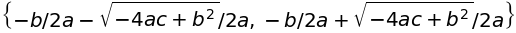

In [23]:
a, b, c = symbols("a b c")
solveset(a*x**2 + b*x + c, x)

Debemos ingresar la expresión igualada a 0, o como una ecuación

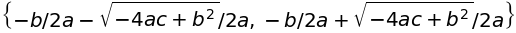

In [24]:
solveset(Eq(a*x**2 + b*x, -c), x)

``solveset`` no permite resolver sistemas de ecuaciones no lineales, por ejemplo


In [25]:
solve([x*y - 1, x - 2], x, y)

### Álgebra lineal

Usamos ``Matrix`` para crear matrices. Las matrices pueden contener variables y expresiones matemáticas.

Usamos el método ``.inv()`` para calcular la inversa, y ``*`` para multiplicar matrices.

In [26]:
A = Matrix([
        [1, -1],
        [1, sin(c)]
    ])
display(A)

⎡1    -1  ⎤
⎢         ⎥
⎣1  sin(c)⎦

In [27]:
B = A.inv()
display(B)

⎡  sin(c)        1     ⎤
⎢──────────  ──────────⎥
⎢sin(c) + 1  sin(c) + 1⎥
⎢                      ⎥
⎢   -1           1     ⎥
⎢──────────  ──────────⎥
⎣sin(c) + 1  sin(c) + 1⎦

In [28]:
A * B

⎡  sin(c)         1                              ⎤
⎢────────── + ──────────             0           ⎥
⎢sin(c) + 1   sin(c) + 1                         ⎥
⎢                                                ⎥
⎢                           sin(c)         1     ⎥
⎢           0             ────────── + ──────────⎥
⎣                         sin(c) + 1   sin(c) + 1⎦

Esta expresión debería ser la matriz identidad, simplifiquemos la expresión.
Existen varias formas de simplificar expresiones, y ``simplify`` es la más general.

In [29]:
simplify(A * B)

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

### Graficación

SymPy permite realizar gráficos 2D y 3D

In [30]:
from sympy.plotting import plot3d

<IPython.core.display.Javascript object>


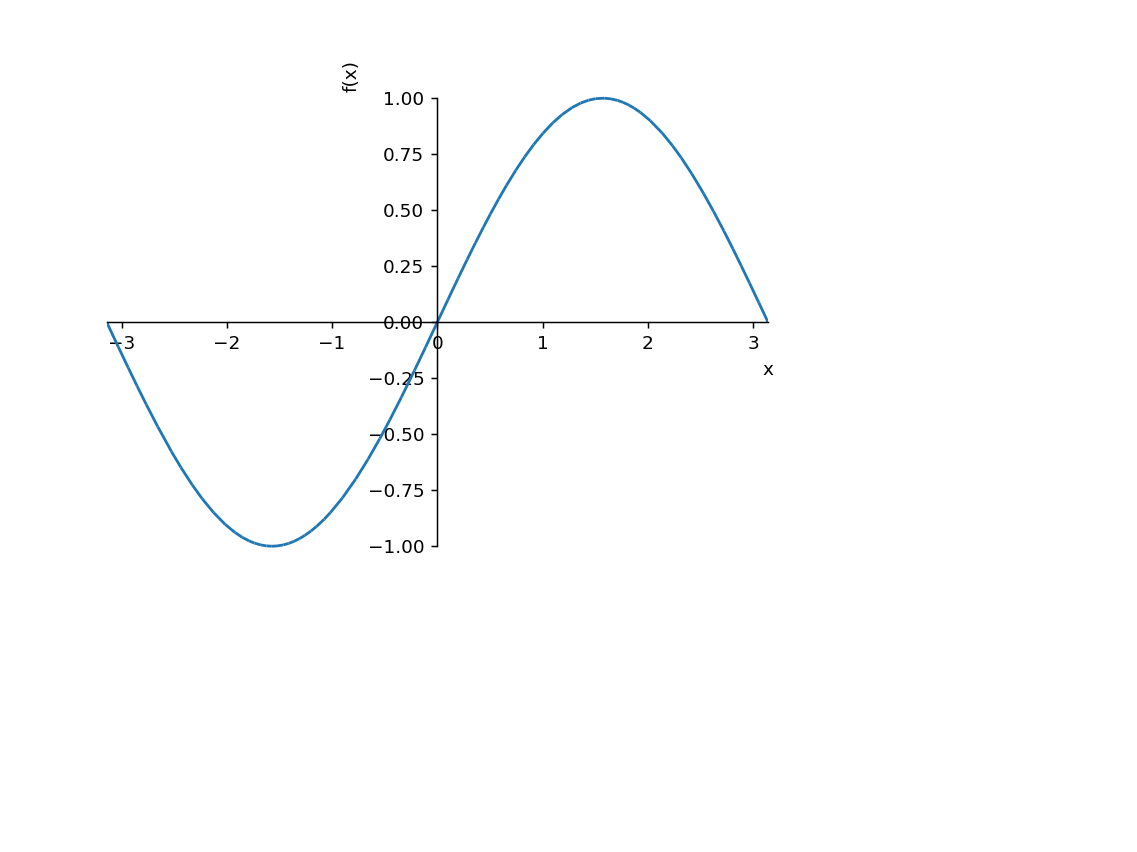

In [31]:
plot(sin(x), (x, -pi, pi));

<IPython.core.display.Javascript object>


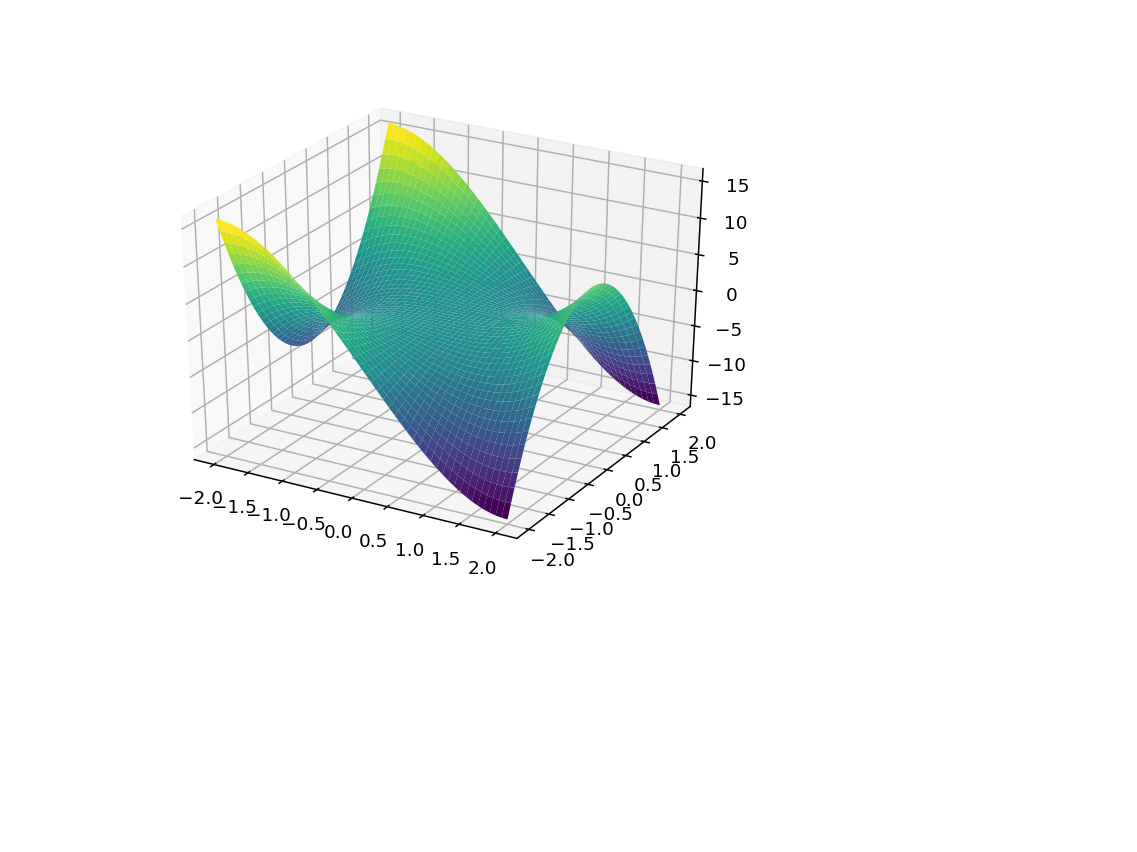

In [32]:
monkey_saddle = x**3 - 3*x*y**2
p = plot3d(monkey_saddle, (x, -2, 2), (y, -2, 2))

### Derivadas y ecuaciones diferenciales

Podemos usar la función ``diff`` o el método ``.diff()`` para calcular derivadas.

In [33]:
f = lambda x: x**2

In [34]:
diff(f(x), x)

In [35]:
f(x).diff(x)

In [36]:
g = lambda x: sin(x)

In [37]:
diff(g(f(x)), x)

Y sí, ¡SymPy sabe sobre la regla de la cadena!

Para terminar, resolvamos una ecuación diferencial de segundo orden

$$ u''(t) + \omega^2 u(t) = 0$$

In [38]:
t = symbols("t")
u = symbols("u", cls=Function)
omega = symbols("omega", positive=True)

In [39]:
ode = u(t).diff(t, 2) + omega**2 * u(t)
dsolve(ode, u(t))

## Convertir expresiones de SymPy en funciones de NumPy

``lambdify`` permite convertir expresiones de sympy en funciones para hacer cálculos usando NumPy.

Veamos cómo.

In [40]:
f = lambdify(x, x**2, "numpy")
f(3)

9

In [41]:
f(np.array([1, 2, 3]))

array([1, 4, 9])

Intentemos un ejemplo más complejo

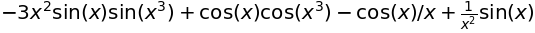

In [42]:
fun = diff(sin(x)*cos(x**3) - sin(x)/x, x)
fun

In [43]:
fun_numpy = lambdify(x, fun, "numpy")

y evalúemoslo en algún intervalo, por ejemplo, $[0, 5]$.

In [44]:
pts = np.linspace(0, 5, 1000)
fun_pts = fun_numpy(pts + 1e-6) # Para evitar división por 0

<IPython.core.display.Javascript object>


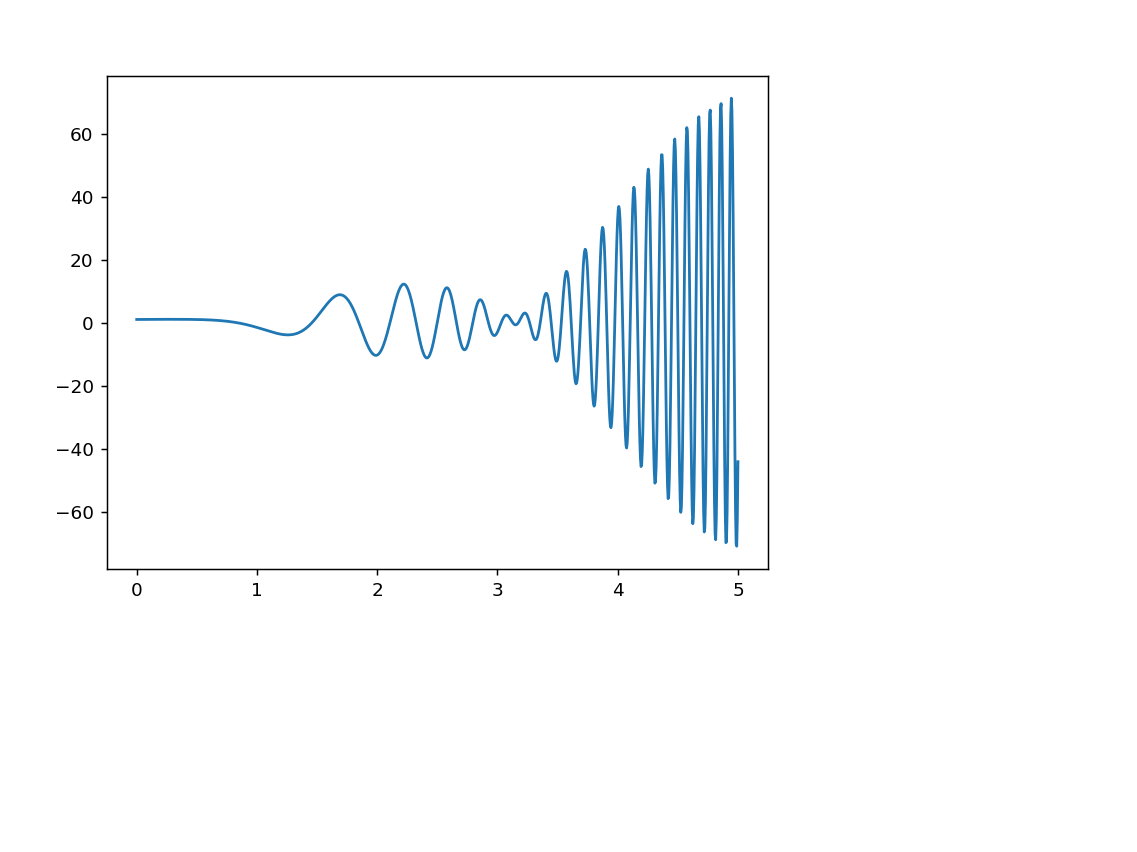

In [45]:
plt.figure()
plt.plot(pts, fun_pts)

## Ejercicios

1. Calcule el límite

  $$ \lim_{x \rightarrow 0} \frac{\sin(x)}{x}\, .$$

2. Resuelva la ecuación diferencial de Bernoulli

  $$x \frac{\mathrm{d} u(x)}{\mathrm{d}x}  + u(x) - u(x)^2 = 0\, .$$


## Recursos adicionales

- Equipo de desarrollo de SymPy. [SymPy Tutorial](http://docs.sympy.org/latest/tutorial/index.html), (2018). Consultado: Julio 23, 2018
- Ivan Savov. [Taming math and physics using SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf), (2017). Consultado: Julio 23, 2018